In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('DataSet2.csv', delimiter=',', dtype=np.float)
data

array([8.7228, 8.6294, 7.3518, ..., 8.2214, 6.8644, 6.7713])

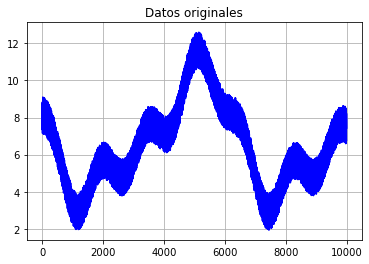

In [3]:
plt.grid()
plt.title('Datos originales')
plt.plot(data, '-b')
plt.show()

In [4]:
noise = 0.1
noise

0.1

In [5]:
samples, = data.shape
samples

10000

In [6]:
dim = 1
dim

1

In [7]:
data_noise = data + noise * np.random.rand(samples)
data_noise

array([8.80251874, 8.71381972, 7.39710105, ..., 8.23332496, 6.86750005,
       6.81965439])

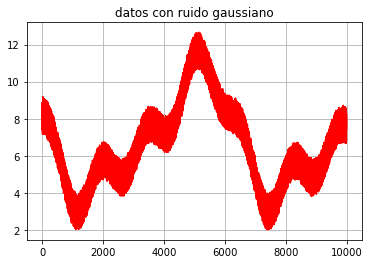

In [8]:
plt.grid()
plt.title('datos con ruido gaussiano')
plt.plot(data_noise, '-r')
plt.show()

In [9]:
# Retardos por filtro
p = 5
p

5

In [10]:
w = np.zeros([2, dim])
w

array([[0.],
       [0.]])

In [11]:
b = 0
b

0

In [12]:
eta = 0.00005
eta

0.0005

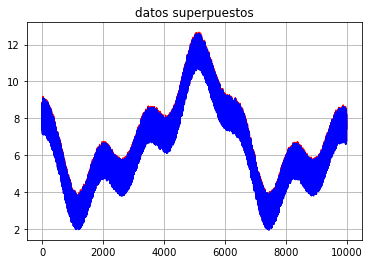

In [13]:
plt.grid()
plt.title('datos superpuestos')
plt.plot(data_noise, '-r', label='noise')
plt.plot(data, '-b', label='data')
plt.show()

In [14]:
x = data.reshape(samples, dim)
x

array([[8.7228],
       [8.6294],
       [7.3518],
       ...,
       [8.2214],
       [6.8644],
       [6.7713]])

In [15]:
y = 3 * np.cos(x) - 2 + np.sin(2*x+0.5) + np.cos(4*x-0.2) + 9
y

array([[ 2.9324428 ],
       [ 3.04162184],
       [ 8.33173298],
       ...,
       [ 5.27487644],
       [ 9.97704744],
       [10.46452266]])

In [16]:
z = data_noise.reshape(samples, dim)
z

array([[8.80251874],
       [8.71381972],
       [7.39710105],
       ...,
       [8.23332496],
       [6.86750005],
       [6.81965439]])

In [17]:
X = np.array([np.ones([samples, dim]) ,x])
X

array([[[1.    ],
        [1.    ],
        [1.    ],
        ...,
        [1.    ],
        [1.    ],
        [1.    ]],

       [[8.7228],
        [8.6294],
        [7.3518],
        ...,
        [8.2214],
        [6.8644],
        [6.7713]]])

In [18]:
y_hat = np.zeros([samples, dim])
y_hat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [19]:
y_hat[0:p] = z[0:p]
y_hat

array([[8.80251874],
       [8.71381972],
       [7.39710105],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [20]:
for j in range(p, samples):
    for k in range(p):
        estimado = w.conj().T @ X[:, j]
        w = w + eta * (z[j, :] - estimado) * X[:,j]
    y_hat[j, 0] = w.conj().T @ X[:, j]

In [21]:
y_hat

array([[8.80251874],
       [8.71381972],
       [7.39710105],
       ...,
       [8.25126063],
       [6.90221281],
       [6.81110256]])

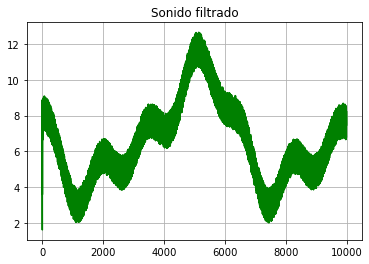

In [22]:
plt.grid()
plt.title('Datos filtrado')
plt.plot(y_hat, '-g', label='filtered')
plt.show()

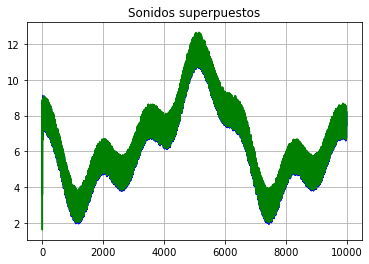

In [23]:
plt.grid()
plt.title('Datos superpuestos')
plt.plot(data, '-b', label='data')
plt.plot(y_hat, '-g', label='filtered')
plt.show()